<a href="https://colab.research.google.com/github/have-not/tutorial-ml-exercises/blob/master/3_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 実習3
### Convolutional Neural Network(CNN)でMnistデータの分類
### 単にMLPを使用した時より正答率が上昇するはず

In [1]:
import numpy as np
import pandas as pd
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import time

Using TensorFlow backend.


In [0]:
batch_size = 128
num_classes = 10
epochs = 10

In [0]:
# イメージサイズの設定
img_rows, img_cols = 28, 28

In [4]:
# tMnistデータをダウンロード。既に訓練データとテストデータに分割されている。
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [0]:
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

#"K.image_data_format()がchannels_first"の場合、入力のshapeは(batch, channels, row, column)に変換,
#"K.image_data_format()がchannels_last"の場合，入力のshapeは(batch, row, column, channels)に変換。
#home/.keras/keras.jsonにchannels last or firstの情報があります。

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
#channels_lastになっている

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# 教師データ(y_train, y_test)をOne hotなベクトルへ変換する
Y_train = keras.utils.to_categorical(y_train, num_classes)
Y_test = keras.utils.to_categorical(y_test, num_classes)

In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape = input_shape))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) 
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               409728    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 437,482
Trainable params: 437,482
Non-trainable params: 0
____________________________________________

In [9]:
"""
# keras functional APIを使ったmodelの書き方
from keras.layers import Conv2D, MaxPooling2D, Input
from keras import layers
from keras import Model

# モデルの構築
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu')(input_img)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = layers.Dense(128, activation ='relu')(x)
x = Dropout(0.25)(x)
output_tensor = layers.Dense(10, activation='softmax')(x)

# Modelクラスで入力テンソルと出力テンソルをモデルに変換する
model = Model(input_img, output_tensor)

model.summary()#モデルの内容を表示
"""

"\n# keras functional APIを使ったmodelの書き方\nfrom keras.layers import Conv2D, MaxPooling2D, Input\nfrom keras import layers\nfrom keras import Model\n\n# モデルの構築\ninput_img = Input(shape=(28, 28, 1))\nx = Conv2D(32, (3, 3), activation='relu')(input_img)\nx = Conv2D(32, (3, 3), activation='relu')(x)\nx = MaxPooling2D((2, 2), strides=(2, 2))(x)\nx = Dropout(0.25)(x)\nx = Flatten()(x)\nx = layers.Dense(128, activation ='relu')(x)\nx = Dropout(0.25)(x)\noutput_tensor = layers.Dense(10, activation='softmax')(x)\n\n# Modelクラスで入力テンソルと出力テンソルをモデルに変換する\nmodel = Model(input_img, output_tensor)\n\nmodel.summary()#モデルの内容を表示\n"

In [10]:
#計算を開始します。GPUを使ってないと、とても時間がかかります。
from keras.optimizers import SGD
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=SGD(lr=0.01),
              metrics=['accuracy'])

start = time.time() #処理を始めた時間を記録
hist = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))
elapsed_time = time.time() - start #(処理時間)＝(処理が終わった時間)ー(処理を始めた時間)
print("計算時間:",elapsed_time,"秒") 

# lossとAccuracyを出す
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 12s 202us/step - loss: 0.7946 - acc: 0.7560 - val_loss: 0.3332 - val_acc: 0.8964
Epoch 2/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.2732 - acc: 0.9187 - val_loss: 0.2017 - val_acc: 0.9430
Epoch 3/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1944 - acc: 0.9422 - val_loss: 0.1546 - val_acc: 0.9521
Epoch 4/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.1485 - acc: 0.9560 - val_loss: 0.1348 - val_acc: 0.9617
Epoch 5/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1196 - acc: 0.9652 - val_loss: 0.0986 - val_acc: 0.9699
Epoch 6/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1023 - acc: 0.9690 - val_loss: 0.0867 - val_acc: 0.9732
Epoch 7/10
60000/60000

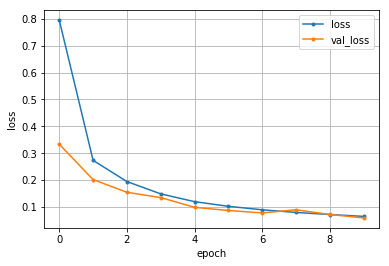

In [11]:
import matplotlib.pyplot as plt
loss = hist.history['loss']
val_loss = hist.history['val_loss']

# lossのグラフ
plt.plot(range(epochs), loss, marker='.', label='loss')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

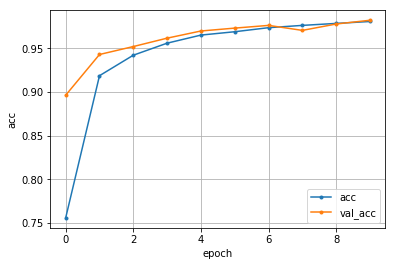

In [12]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']

# accuracyのグラフ
plt.plot(range(epochs), acc, marker='.', label='acc')
plt.plot(range(epochs), val_acc, marker='.', label='val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [13]:
# 正誤表
print('Cross tabulation')
y_pred = model.predict_classes(X_test)
pd.crosstab(y_pred, y_test)

#列：実際の数字
#行：予想した数字
#予想した数字が正しければ、対角部分にカウントされる。

Cross tabulation


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,971,0,2,0,0,3,4,1,2,2
1,1,1126,0,0,0,0,2,6,2,4
2,1,3,1018,1,2,0,1,9,3,1
3,0,0,3,996,0,9,1,3,6,5
4,0,0,1,1,963,0,3,2,2,6
5,0,0,0,2,0,873,3,0,1,1
6,3,2,1,0,3,3,943,0,3,1
7,0,1,2,3,1,1,0,996,3,3
8,2,3,5,3,1,3,1,1,950,0


In [14]:
# 実際に、間違った数字を見る。
test_wrong = [[i,ai,bi] for (i,(ai,bi)) in enumerate(zip(y_pred, y_test))
             if ai != bi]
#print(list(test_wrong))

print('間違ったデータの数は', len(test_wrong),'個です') #間違ったデータの数を表示
wrong = np.array(test_wrong)[0:,0]
print(wrong) #間違った画像の番号を表示

間違ったデータの数は 178 個です
[ 247  321  340  445  449  495  582  591  684  707  720  740  846  947
  965 1003 1014 1039 1112 1173 1182 1194 1226 1232 1242 1247 1260 1299
 1319 1326 1393 1500 1522 1530 1549 1553 1609 1621 1681 1709 1721 1754
 1790 1850 1878 1901 1940 1941 1987 2016 2018 2035 2053 2070 2093 2098
 2109 2118 2129 2130 2135 2182 2189 2272 2293 2387 2414 2454 2488 2514
 2607 2654 2771 2896 2939 2953 3073 3206 3384 3405 3422 3451 3503 3520
 3558 3597 3718 3751 3757 3767 3796 3808 3811 3853 3893 3902 3906 3926
 3941 3951 3976 3985 4065 4078 4102 4163 4176 4224 4238 4248 4306 4400
 4437 4497 4500 4536 4601 4731 4807 4814 4823 4860 4880 4956 4966 5331
 5457 5600 5634 5642 5734 5749 5842 5887 5937 5955 5972 5973 5982 5985
 6023 6042 6045 6059 6495 6505 6571 6576 6597 6599 6651 6783 7216 7432
 7434 7921 8020 8062 8094 8246 8311 8325 8408 9009 9024 9280 9538 9587
 9634 9679 9729 9745 9749 9768 9770 9792 9811 9944]


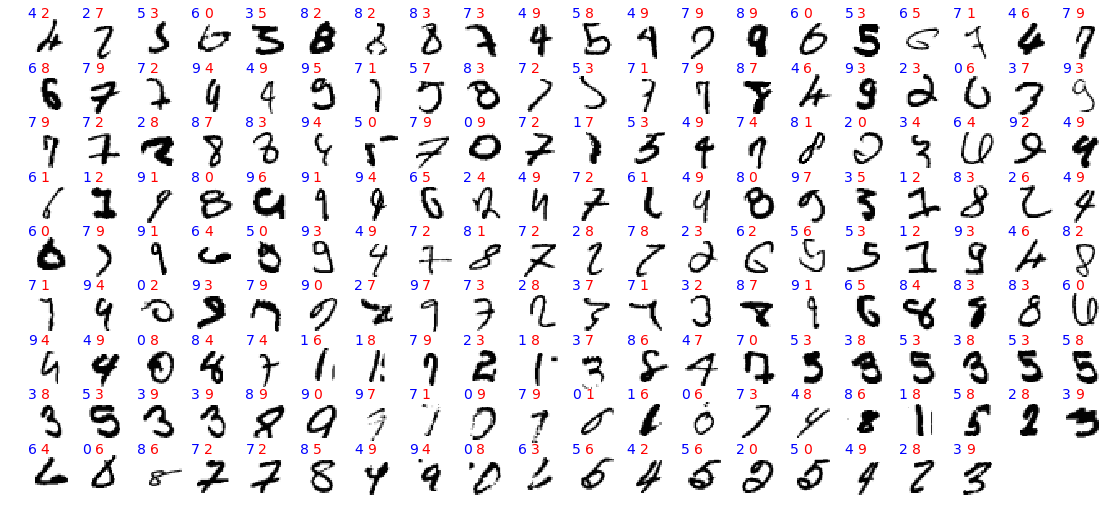

In [15]:
# 間違った画像を見る。
# 青ラベル：実際の数字；赤ラベル：間違えて予測した数字
plt.figure(figsize=(15, 15))
for ind, val in enumerate(wrong):
    plt.subplot(20,20,ind + 1)
    plt.axis("off")
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    im = 1 - X_test[val,:28,:28,0]  #画像の白黒反転
    plt.imshow(im, cmap='gray')
    plt.text(8, 0, test_wrong[ind][1], fontsize=14, color='red')
    plt.text(0, 0, test_wrong[ind][2], fontsize=14, color='blue')
plt.show()

In [16]:
#学習後のフィルターの可視化
# Kerasでは、以下のようにレイヤーごとのパラメータが取得できる
lays = model.layers # list of the layers
for i, l in enumerate(lays): #6層分の重みを表示
    print(i+1, l)
w1 = model.layers[0].get_weights()[0] # 1層目（i=0）のレイヤーのweights
b1 = model.layers[0].get_weights()[1] # とbiasのshape

print(w1.shape, b1.shape)
print(model.layers[0].get_weights()[0].shape) # 1層目（i=0）のレイヤー

1 <keras.layers.convolutional.Conv2D object at 0x7f031101b0f0>
2 <keras.layers.convolutional.Conv2D object at 0x7f031101b0b8>
3 <keras.layers.pooling.MaxPooling2D object at 0x7f03103a85f8>
4 <keras.layers.core.Flatten object at 0x7f0310ffec50>
5 <keras.layers.core.Dense object at 0x7f0361eb35c0>
6 <keras.layers.core.Dense object at 0x7f03103b8eb8>
(5, 5, 1, 32) (32,)
(5, 5, 1, 32)


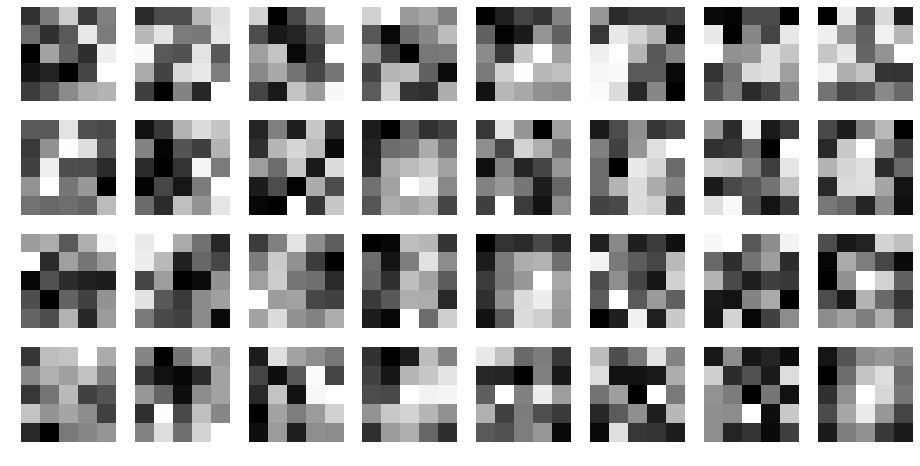

In [17]:
w1 = model.layers[0].get_weights()[0] # 1層目（i=0）のレイヤーのweights

plt.figure(figsize=(16, 8))
for ind, val in enumerate(w1.T):
    plt.subplot(4, 8, ind + 1)
    im = val.reshape((5, 5))
    plt.axis("off")
    plt.imshow(im, cmap='gray', interpolation='nearest')
plt.show()